In [1]:
%%html

​

<script>

  function code_toggle() {

    if (code_shown){

      $('div.input').hide('500');

      $('#toggleButton').val('Show Code')

    } else {

      $('div.input').show('500');

      $('#toggleButton').val('Hide Code')

    }

    code_shown = !code_shown

  }

  

  $( document ).ready(function(){

    code_shown=false;

    $('div.input').hide()

  });

</script>

<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>




<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Explore historical funding over the NSERC [Evaluation Groups](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/committees-comites/programs-programmes_eng.asp).


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html).

> **Acknowledgement:** This notebook was constructed using JupyterHub service from [syzygy.ca](http://syzygy.ca) with assistance from [Ian Allison](https://github.com/ianabc) and India Heisz. -- [James Colliander](http://colliand.com)

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

In [9]:
## Load some tools
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

## Load the data from AWS S3 into Jupyter

In [4]:
## Thanks Ian Allison.
## Install some python libraries
import numpy as np
import pandas as pd
import sys

## Build a data frame with NSERC Awards Data by iteratively reading CSV files hosted on AWS S3.
## It would improve reproducibility if we imported from a definitive NSERC Awards Data.
df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so 2017 means we include the 2016 collection but not 2017.

## some columns dropped here for convenience
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 

## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


## Disbursements by Selection Committees

In [5]:
EvaluationGroups = df.loc[(df['Committee']==1501) 
                                   | (df['Committee']==1502)
                                   | (df['Committee']==1503)
                                   | (df['Committee']==1504) 
                                   | (df['Committee']==1505)
                                   | (df['Committee']==1506)
                                   | (df['Committee']==1507)
                                   | (df['Committee']==1508)
                                   | (df['Committee']==1509)
                                   | (df['Committee']==1510)
                                   | (df['Committee']==1511)
                                   | (df['Committee']==1512)]

In [6]:
## 2009 is an outlier so drop it. 2010 is also a bit weird.
EG = EvaluationGroups.loc[~(EvaluationGroups['FiscalYear']==2009)]

In [7]:
EG['FiscalYear'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

## Total Investment vs. Fiscal Year separated by EG Committee

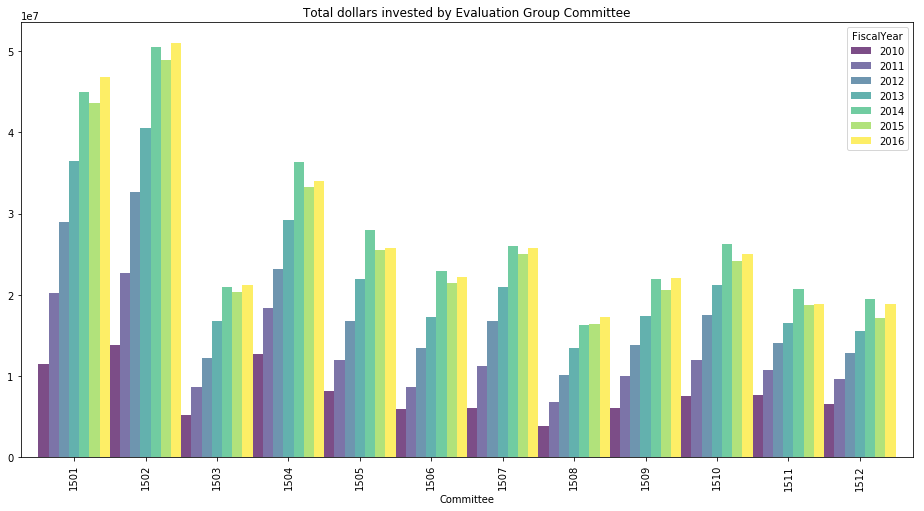

In [10]:
## Total investment dollars vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Total dollars invested by Evaluation Group Committee")

## Number of Awards vs. Fiscal Year separated by EG Committee

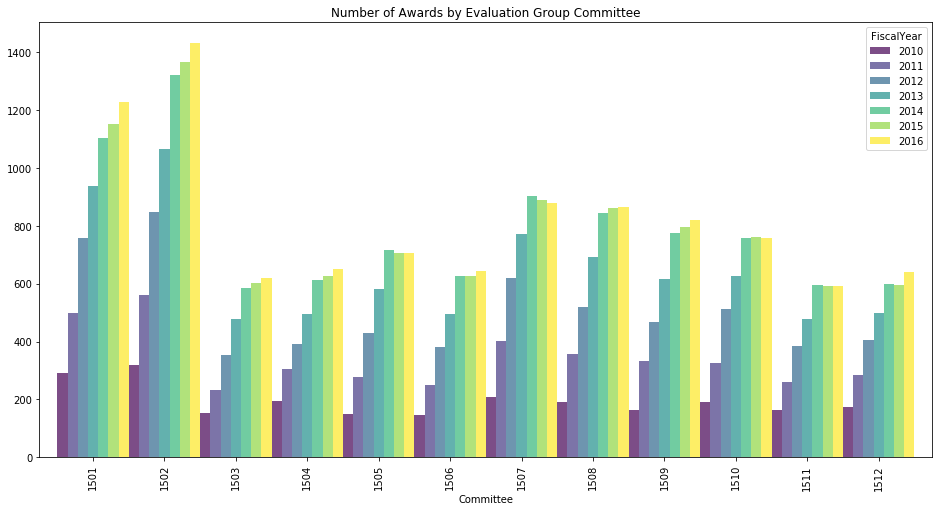

In [11]:
## Number of Awards vs Fiscal Year separated by Evaluation Group Committee
(EG.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Number of Awards by Evaluation Group Committee")

## Average Award Amount vs. Fiscal Year separated by EG Committee

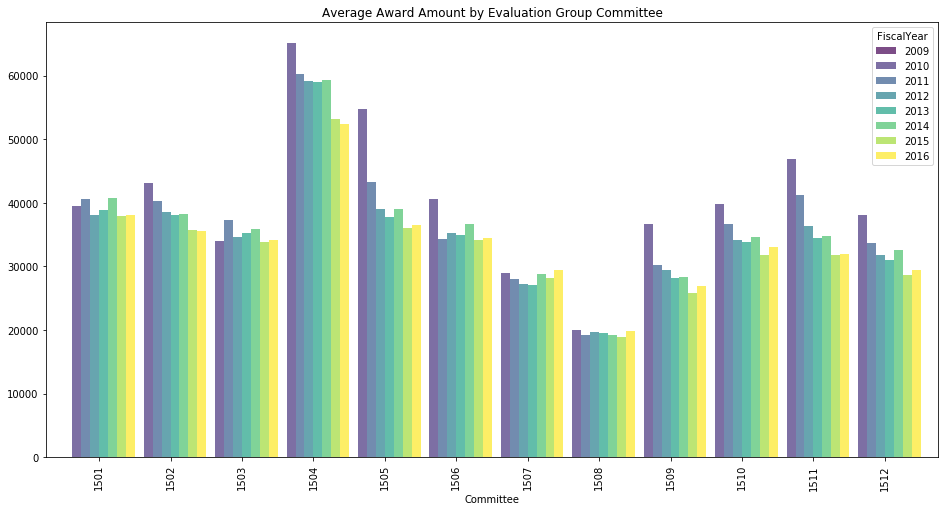

In [12]:
## Total Dollars invested divided by number of awards vs. Fiscal Year separated by Evaluation Group Committee
((EG.groupby(['Committee','FiscalYear']).sum()
 ['AwardAmount'])/(EvaluationGroups.groupby(['Committee','FiscalYear']).count()
 ['AwardAmount'])).unstack().plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1, 
    title="Average Award Amount by Evaluation Group Committee")

### Observations

+ There is a general trend for the average award size to be flat or shrinking. Inflation adjustment would 
shrink more recent years. Note the frequent drop for 2015 and 2016 across most Committees.
+ Section 1508 is visibly underfunded.
+ Chemistry (1504) dropped significantly in 2015 and 2016.

## (work-in-progress) Bin Levels vs. Fiscal Year separated by EG Committee

In [14]:
committee = 1504
fiscal = 2013
sectionyear = EG.loc[(EG['Committee'] == committee) & (EG['FiscalYear'] == fiscal) ]

Distribution of Award Amounts for Evaluation Group 1504 in Fiscal Year 2013


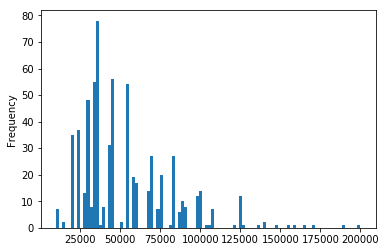

In [29]:
print("Distribution of Award Amounts for Evaluation Group " + str(committee) + " in Fiscal Year " + str(fiscal))
sectionyear['AwardAmount'].plot(kind="hist", bins=100)

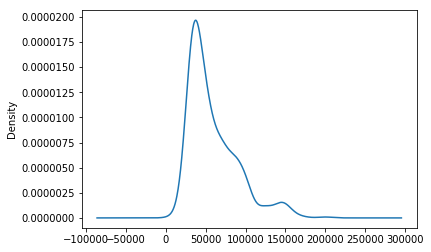

In [16]:
sectionyear['AwardAmount'].plot(kind="kde")

In [17]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]

2010
2011
2012
2013
2014
2015
2016


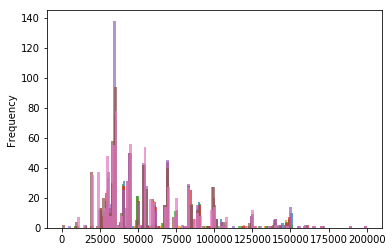

In [19]:
for year in years:
    sectionyear = EG.loc[(EG['Committee'] == committee) & (EG['FiscalYear'] == year) ]
    print(year)
    sectionyear['AwardAmount'].plot(kind="hist", bins=100, alpha=0.7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee59d23d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fee5a3243c8>], dtype=object)

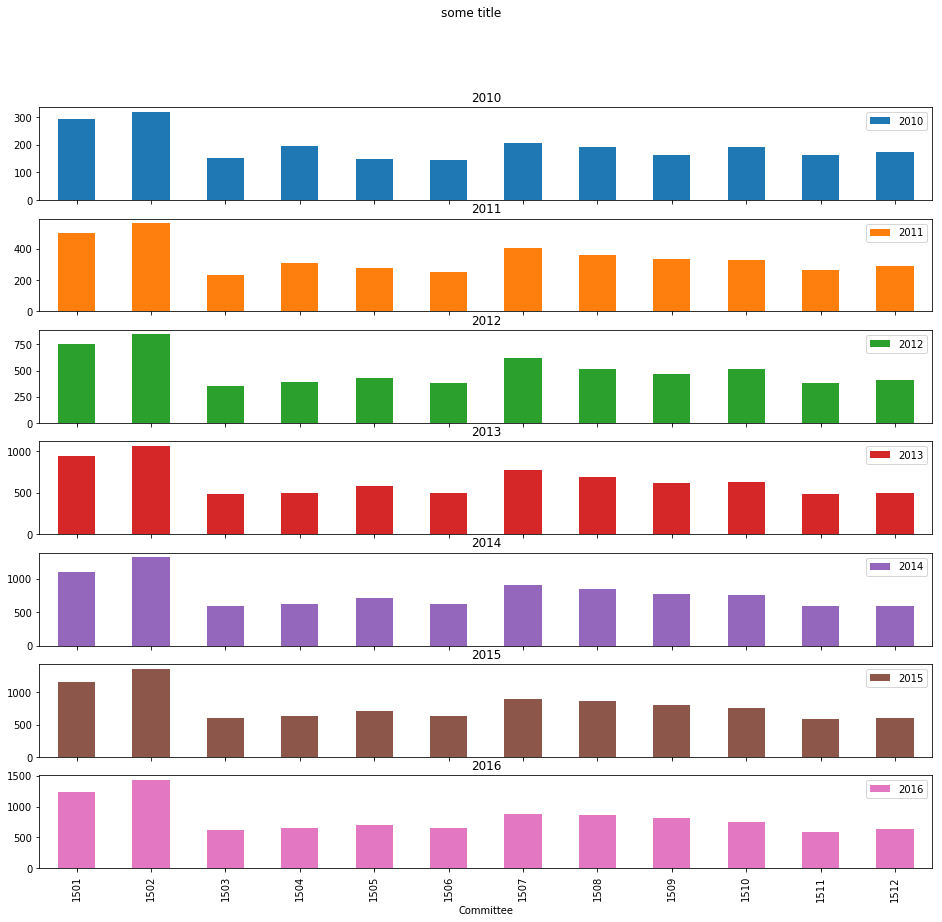

In [21]:
EG.groupby(['Committee','FiscalYear'])['AwardAmount'].count().unstack().plot.bar(subplots=True, 
    figsize=(16, 14),stacked=True, 
    title="some title")